# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">2. Model Training for Gemstone Dataset - Utkarsh Gaikwad</p>

### Loading the necessary Libraries

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Read the Dataset</p>

In [5]:
df = pd.read_csv('./data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
df=df.drop(labels='id',axis=1)

### Dropping id Column

In [7]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Getting X and Y variables</p>

In [8]:
X= df.drop(columns=['price'],axis=1)

In [9]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [12]:
y = df[['price']]
y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Creating Data Transformation Pipeline</p>

In [29]:

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

### Creating Pipeline with Column Transformer

In [ ]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols=[col for col in X.columns if df[col].dtype=='object']
numerical_cols=[col for col in X.columns if df[col].dtype!='object']
numerical_cols=['carat', 'depth', 'table', 'x', 'y', 'z']


['carat', 'depth', 'table', 'x', 'y', 'z']

In [27]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']


In [31]:
# Numerical pipeline 
num_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='median')),
        ("StandardScaler",StandardScaler())
    ]
)

# categorical Pipeline
cat_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("OrdinalEncoder",OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))
    ]
)

In [32]:
preprocessor= ColumnTransformer(
    [
        ("num_pipeline",num_pipeline,numerical_cols),
        ("cat_pipeline",cat_pipeline,categorical_cols)
    ]
)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Train Test Split</p>

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Transforming the data with pipeline created</p>

In [49]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [50]:
preprocessor.get_feature_names_out()

array(['num_pipeline__carat', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z', 'cat_pipeline__cut', 'cat_pipeline__color',
       'cat_pipeline__clarity'], dtype=object)

In [51]:
X_train.head(3)

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-1.016395,-0.204317,0.402608,-1.202472,-1.187395,-1.194148,3.0,1.0,2.0
1,0.882396,0.720758,-0.118536,0.985177,0.941823,1.036109,3.0,2.0,3.0
2,1.529711,0.350728,-1.160823,1.426308,1.394848,1.441611,4.0,5.0,3.0


In [53]:
X_test.head(3)

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.628006,0.258221,-0.118536,-0.599293,-0.580341,-0.571414,4.0,0.0,2.0
1,2.608569,-2.146973,-0.118536,2.128516,2.201232,1.962969,2.0,3.0,1.0
2,-1.124281,-1.221899,0.923751,-1.373523,-1.413907,-1.469310,3.0,1.0,6.0


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Model Training Baseline models</p>

In [ ]:
def evaluate_model(model,y_test,y_pred):
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    mae=mean_absolute_error(y_test,y_pred)
    y_train_pred=model.predict(X_train)
    r2_train=r2_score(y_train,y_train_pred)
    r2=r2_score(y_test,y_pred)
    r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

        # Printing Evaluation Matrix
    print("MSE :" , mse)
    print("RMSE :" ,rmse)
    print("MAE :" ,mae)
    print("Train R2 :" ,r2_train)
    print("Test R2 :" ,r2)
    print("Adjusted R2 : ", r2_adjusted)


    plt.figure(figsize=(12,6))
    plt.plot((y_pred)[:100])
    plt.plot(np.array(y_test)[:100])
    plt.legend(["Predicted","Actual"])
    plt.title('Actual and Predicted Sales', fontsize=12)
    model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
    return model_score

### Create an Evaluate Function to give all metrics after model Training

In [56]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

### Training Various models

In [57]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [73]:

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train.values.flatten()) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1016.9490
- Mean Absolute Error: 677.1656
- R2 Score: 0.9366
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1006.6010
- Mean Absolute Error: 671.5856
- R2 Score: 0.9373


Lasso
Model performance for Training set
- Root Mean Squared Error: 1017.0710
- Mean Absolute Error: 678.4491
- R2 Score: 0.9366
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1006.8716
- Mean Absolute Error: 672.9964
- R2 Score: 0.9373


Ridge
Model performance for Training set
- Root Mean Squared Error: 1016.9491
- Mean Absolute Error: 677.1934
- R2 Score: 0.9366
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1006.6062
- Mean Absolute Error: 671.6146
- R2 Score: 0.9373


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 548.6869
- Mean Absolute Error: 287.4988
- R2 Sco

### Results

In [74]:
df_results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
df_results

,Model Name,R2_Score
7,CatBoosting Regressor,0.979186
6,XGBRegressor,0.978790
5,Random Forest Regressor,0.977143
3,K-Neighbors Regressor,0.972156
4,Decision Tree,0.957215
0,Linear Regression,0.937298
2,Ridge,0.937297
1,Lasso,0.937264
8,AdaBoost Regressor,0.896940


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">For more meterics detials</p>

In [75]:
# Function to evaluate model
def evaluate_model_(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_adjusted = 1 - (1 - r2) * ((len(X_test) - 1) / (len(X_test) - X_test.shape[1] - 1))

    # Store scores
    model_score = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "Train R2": r2_train,
        "Test R2": r2,
        "Adjusted R2": r2_adjusted
    }

    return model_score

# Dictionary to store results
score_dict = {}

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train.values.flatten())  # Train model
    
    print(f"\n{name}")
    scores = evaluate_model_(model, X_train, y_train, X_test, y_test)
    
    # Store in dictionary
    score_dict[name] = scores

# Convert to DataFrame
score_df = pd.DataFrame(score_dict).T

# Display results
print(score_df)



Linear Regression

Lasso

Ridge

K-Neighbors Regressor

Decision Tree

Random Forest Regressor

XGBRegressor

CatBoosting Regressor

AdaBoost Regressor
                                  MSE         RMSE         MAE  Train R2  \
Linear Regression        1.013246e+06  1006.600986  671.585639  0.936573   
Lasso                    1.013790e+06  1006.871584  672.996416  0.936558   
Ridge                    1.013256e+06  1006.606241  671.614564  0.936573   
K-Neighbors Regressor    4.499524e+05   670.784896  350.551022  0.981536   
Decision Tree            7.009902e+05   837.251598  422.665763  0.999990   
Random Forest Regressor  3.713110e+05   609.352907  310.426625  0.996808   
XGBRegressor             3.427367e+05   585.437176  296.958191  0.983781   
CatBoosting Regressor    3.363506e+05   579.957390  295.484448  0.982731   
AdaBoost Regressor       1.941618e+06  1393.419673  971.554290  0.882721   

                          Test R2  Adjusted R2  
Linear Regression        0.937298    

In [78]:
score_df=score_df.sort_values(by='Test R2',ascending=False).round(4)
score_df

,MSE,RMSE,MAE,Train R2,Test R2,Adjusted R2
CatBoosting Regressor,3.363506e+05,579.9574,295.4844,0.9827,0.9792,0.9792
XGBRegressor,3.427367e+05,585.4372,296.9582,0.9838,0.9788,0.9788
Random Forest Regressor,3.713110e+05,609.3529,310.4266,0.9968,0.9770,0.9770
K-Neighbors Regressor,4.499524e+05,670.7849,350.5510,0.9815,0.9722,0.9721
Decision Tree,7.009902e+05,837.2516,422.6658,1.0000,0.9566,0.9566
Linear Regression,1.013246e+06,1006.6010,671.5856,0.9366,0.9373,0.9373
Ridge,1.013256e+06,1006.6062,671.6146,0.9366,0.9373,0.9373
Lasso,1.013790e+06,1006.8716,672.9964,0.9366,0.9373,0.9372
AdaBoost Regressor,1.941618e+06,1393.4197,971.5543,0.8827,0.8798,0.8798


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Hyperparameter tuning</p>

### Tuning Catboost

In [79]:
# Initializing catboost
cbr = CatBoostRegressor(verbose=False)

# Creating the hyperparameter grid
param_dist = {'depth'          : [4,5,6,7,8,9, 10],
              'learning_rate' : [0.01,0.02,0.03,0.04],
               'iterations'    : [300,400,500,600]}

#Instantiate RandomSearchCV object
rscv = RandomizedSearchCV(cbr , param_dist, scoring='r2', cv =5, n_jobs=-1)

# Fit the model
rscv.fit(X_train, y_train.values.flatten())

# Print the tuned parameters and score
print(rscv.best_params_)
print(rscv.best_score_)

{'learning_rate': 0.02, 'iterations': 500, 'depth': 9}
0.9797250612113972


### Definition to print evaluated model results

In [80]:
def print_evaluated_results(model,xtrain,ytrain,xtest,ytest):
    ytrain_pred = model.predict(X_train)
    ytest_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, ytrain_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, ytest_pred)

    # Printing results
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

In [82]:
# Selecting best model
best_cbr = rscv.best_estimator_

# Evaluate Train and Test dataset
print_evaluated_results(best_cbr,X_train,y_train,X_test,y_test)

Model performance for Training set
- Root Mean Squared Error: 562.5754
- Mean Absolute Error: 295.9284
- R2 Score: 0.9806
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 576.8982
- Mean Absolute Error: 297.5840
- R2 Score: 0.9794


Text(0.5, 1.0, 'Actual and Predicted Sales')

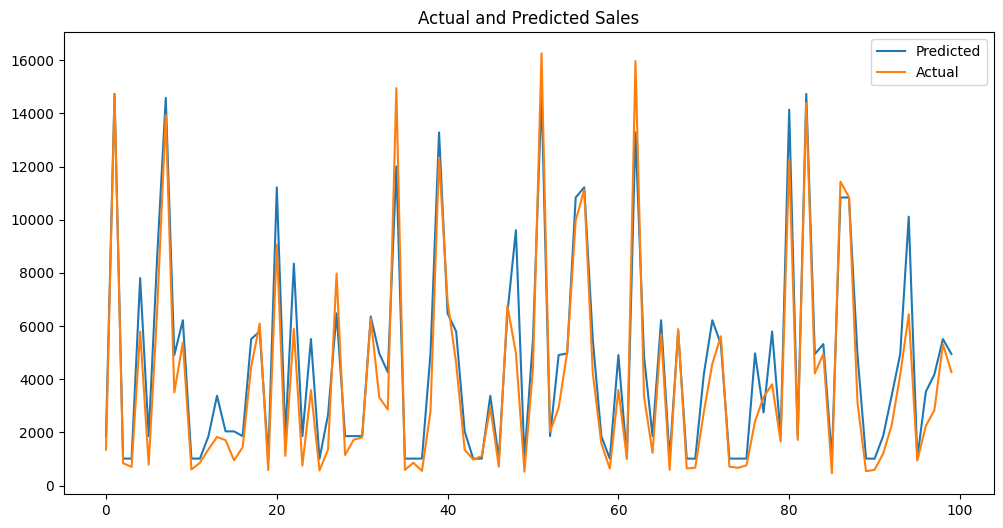

In [85]:
plt.figure(figsize=(12,6))
plt.plot((y_test_pred)[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Sales', fontsize=12)

In [84]:
y_test

,price
14868,1355
165613,14691
96727,844
145593,707
118689,5797
...,...
168548,3864
167333,734
113317,3950
25575,1197


### Tuning KNN

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
# Initialize knn
knn = KNeighborsRegressor()

# parameters
k_range = list(range(2, 31))
param_grid = dict(n_neighbors=k_range)

# Fitting the cvmodel
grid = GridSearchCV(knn, param_grid, cv=5, scoring='r2',n_jobs=-1)
grid.fit(X_train, y_train)

# Print the tuned parameters and score
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 18}
0.9734862292372395


In [88]:
# Selecting best model
best_knn = grid.best_estimator_

# Evaluate Train and Test dataset
print_evaluated_results(best_knn,X_train,y_train,X_test,y_test)

Model performance for Training set
- Root Mean Squared Error: 616.2496
- Mean Absolute Error: 324.8922
- R2 Score: 0.9767
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 644.9691
- Mean Absolute Error: 339.8430
- R2 Score: 0.9743


Text(0.5, 1.0, 'Actual and Predicted Sales')

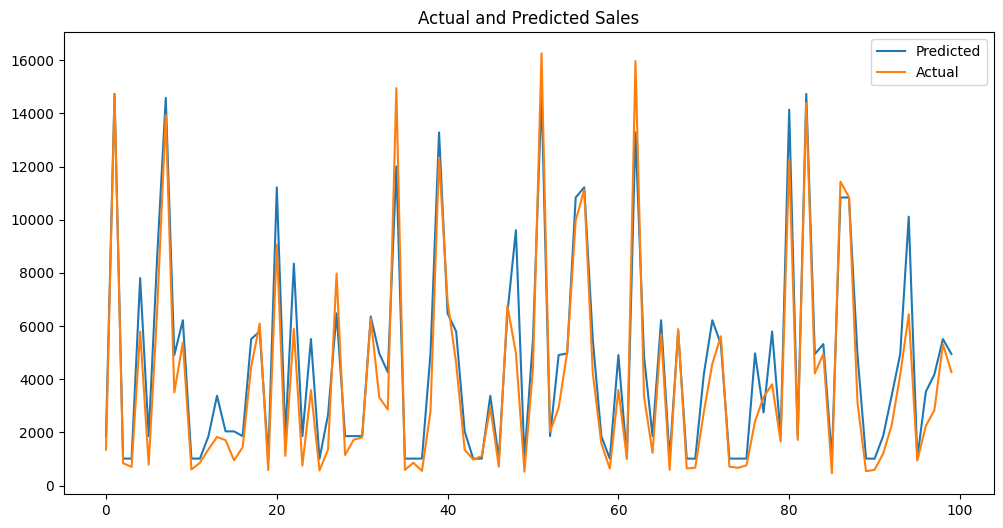

In [89]:
plt.figure(figsize=(12,6))
plt.plot((y_test_pred)[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Sales', fontsize=12)

### Tuning XGBoost

In [90]:
# Initializing xgboost
xgb = XGBRegressor()

# Parameters
params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ],
 'n_estimators':[300,400,500,600]
}

rs_xgb=RandomizedSearchCV(xgb,param_distributions=params,scoring='r2',n_jobs=-1,cv=5)
rs_xgb.fit(X_train, y_train.values.flatten())

# Print the tuned parameters and score
print(rs_xgb.best_params_)
print(rs_xgb.best_score_)

{'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.7}
0.9794634938240051


In [91]:
# Selecting best xgb model
best_xgb = rs_xgb.best_estimator_

# Evaluate Train and Test dataset
print_evaluated_results(best_xgb,X_train,y_train,X_test,y_test)

Model performance for Training set
- Root Mean Squared Error: 520.4147
- Mean Absolute Error: 275.5775
- R2 Score: 0.9834
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 578.5346
- Mean Absolute Error: 292.8793
- R2 Score: 0.9793


Text(0.5, 1.0, 'Actual and Predicted Sales')

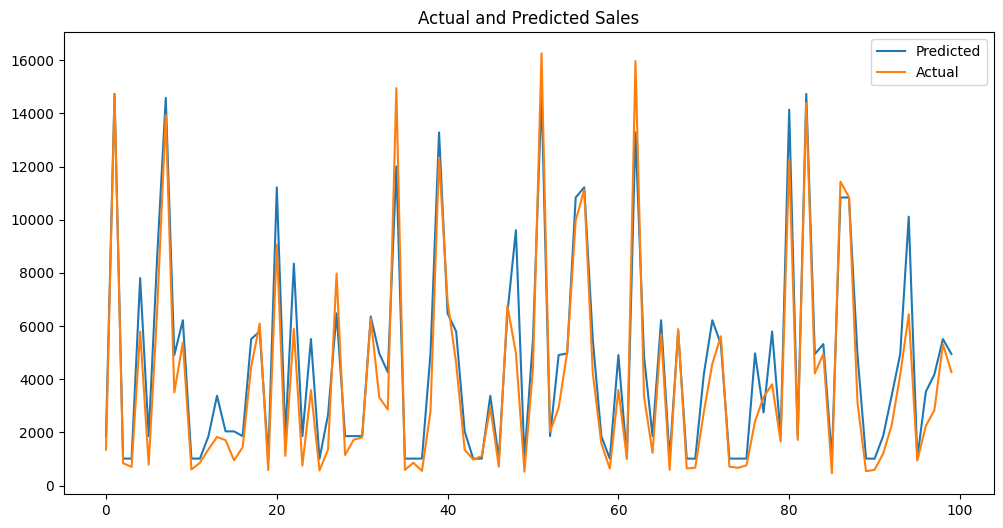

In [92]:
plt.figure(figsize=(12,6))
plt.plot((y_test_pred)[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Sales', fontsize=12)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Voting Regressor</p>

In [ ]:
from sklearn.ensemble import VotingRegressor

er = VotingRegressor([('cbr',best_cbr),('knn',best_knn),('xgb',XGBRegressor())], weights=[3,1,2])
er.fit(X_train, y_train.values.flatten())

print_evaluated_results(er,xtrain,ytrain,xtest,ytest)

Model performance for Training set
- Root Mean Squared Error: 532.5211
- Mean Absolute Error: 281.9885
- R2 Score: 0.9826
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 575.7354
- Mean Absolute Error: 293.7040
- R2 Score: 0.9795


### Model improved with Ensemble technique !

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Catboost Model Feature Importances</p>

num_pipeline__carat      20.883447
num_pipeline__y          19.714961
cat_pipeline__clarity    16.771024
num_pipeline__z          15.269708
num_pipeline__x          14.060805
cat_pipeline__color      12.725829
cat_pipeline__cut         0.361402
num_pipeline__table       0.119086
num_pipeline__depth       0.093738
dtype: float64




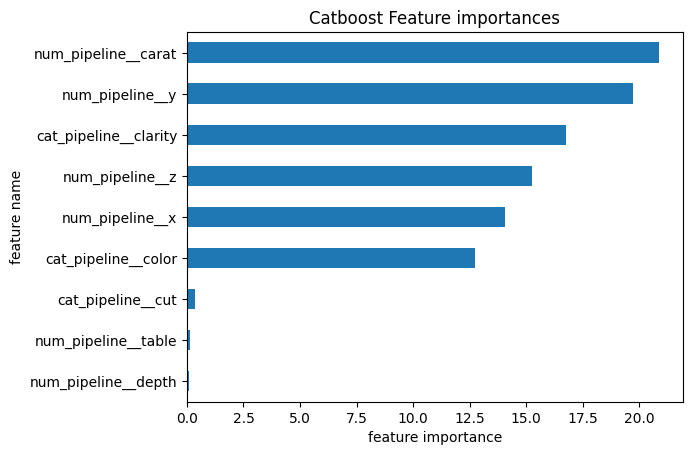

In [93]:
feature_imp = best_cbr.feature_importances_
feature_nm = best_cbr.feature_names_
imp_series = pd.Series(feature_imp)
imp_series.index = feature_nm
print(imp_series.sort_values(ascending=False))
print('\n')
imp_series.sort_values().plot(kind='barh',
                              xlabel='feature importance',
                              ylabel='feature name',
                              title='Catboost Feature importances')
plt.show()